PyGMT information:
  version: v0.14.2
System information:
  python: 3.13.2 | packaged by conda-forge | (main, Feb 17 2025, 14:10:22) [GCC 13.3.0]
  executable: /home/user/miniconda3/envs/pygmt/bin/python
  machine: Linux-5.15.0-134-generic-x86_64-with-glibc2.31
Dependency information:
  numpy: 2.2.4
  pandas: 2.2.3
  xarray: 2025.3.0
  netCDF4: 1.7.2
  packaging: 24.2
  contextily: 1.6.2
  geopandas: 1.0.1
  IPython: 9.0.2
  pyarrow: 19.0.1
  rioxarray: 0.18.2
  gdal: 3.10.2
  ghostscript: 10.04.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /opt/GMT-6.5.0/share
  plugin dir: /home/user/miniconda3/envs/pygmt/lib/gmt/plugins
  library path: /home/user/miniconda3/envs/pygmt/lib/libgmt.so
  cores: 20
  grid layout: rows
  image layout: 
  binary version: 6.5.0


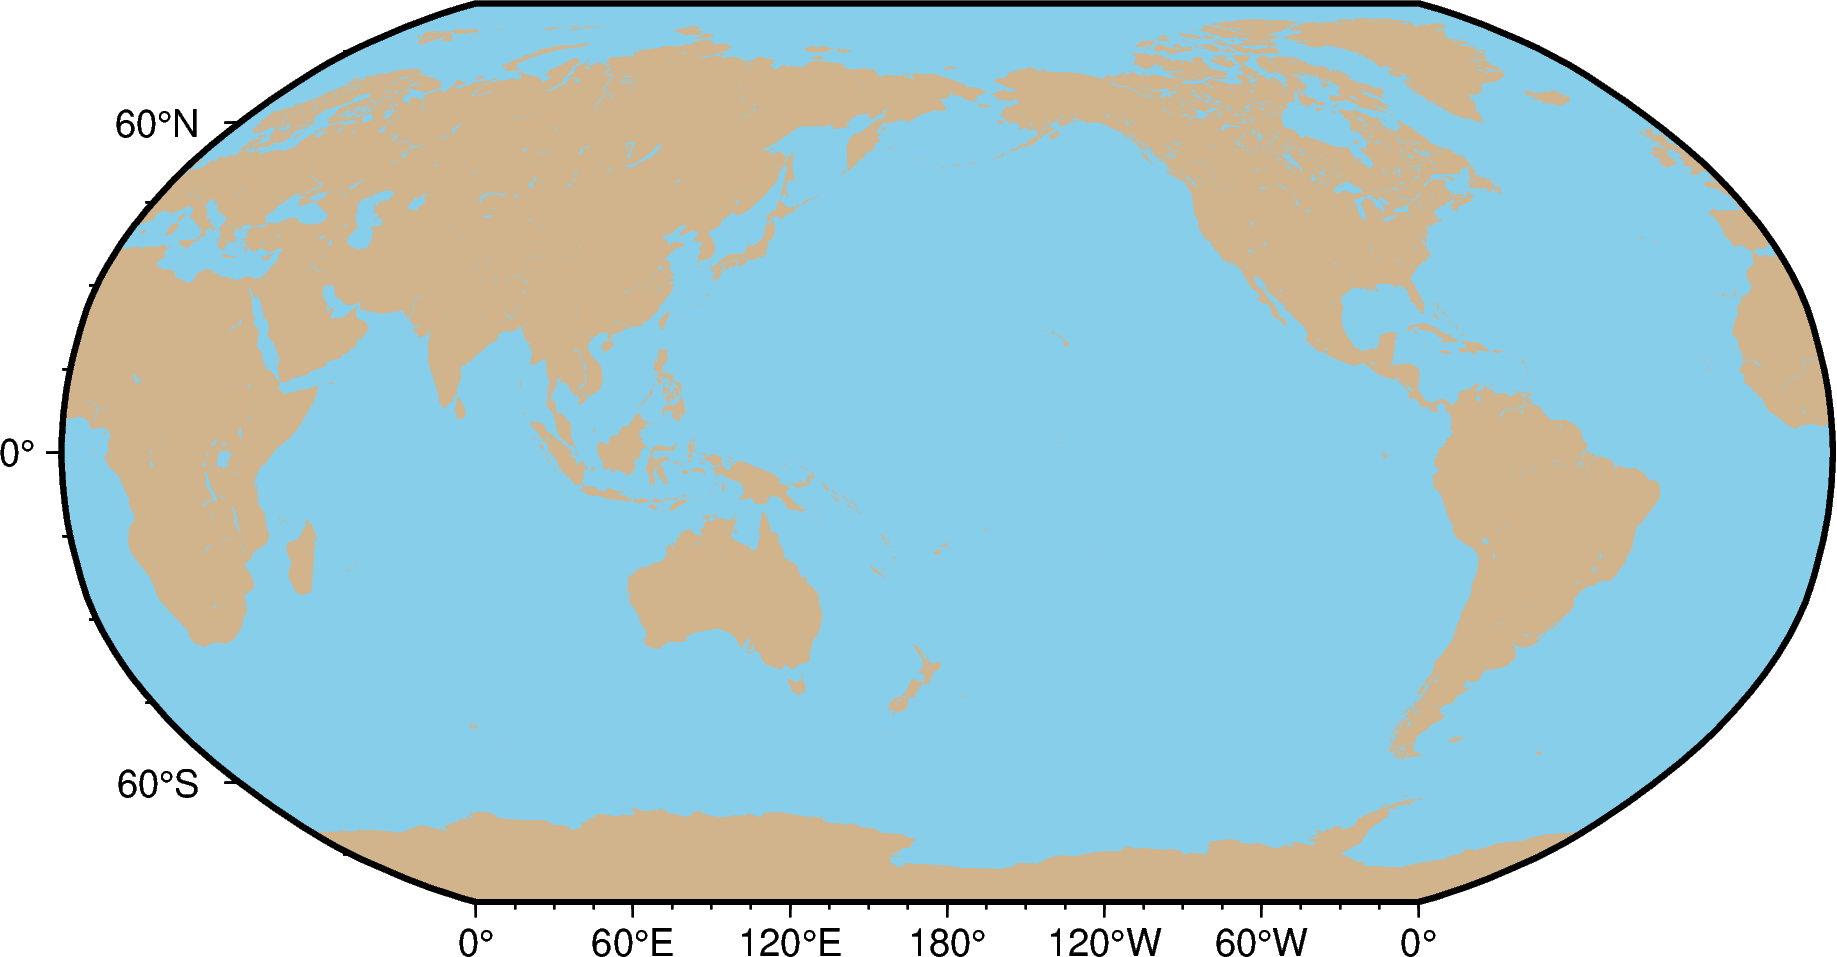

In [1]:
import pygmt
pygmt.show_versions()
fig = pygmt.Figure()
fig.coast(projection="N15c", region="g", frame=True,land="tan",water="skyblue")
fig.show()

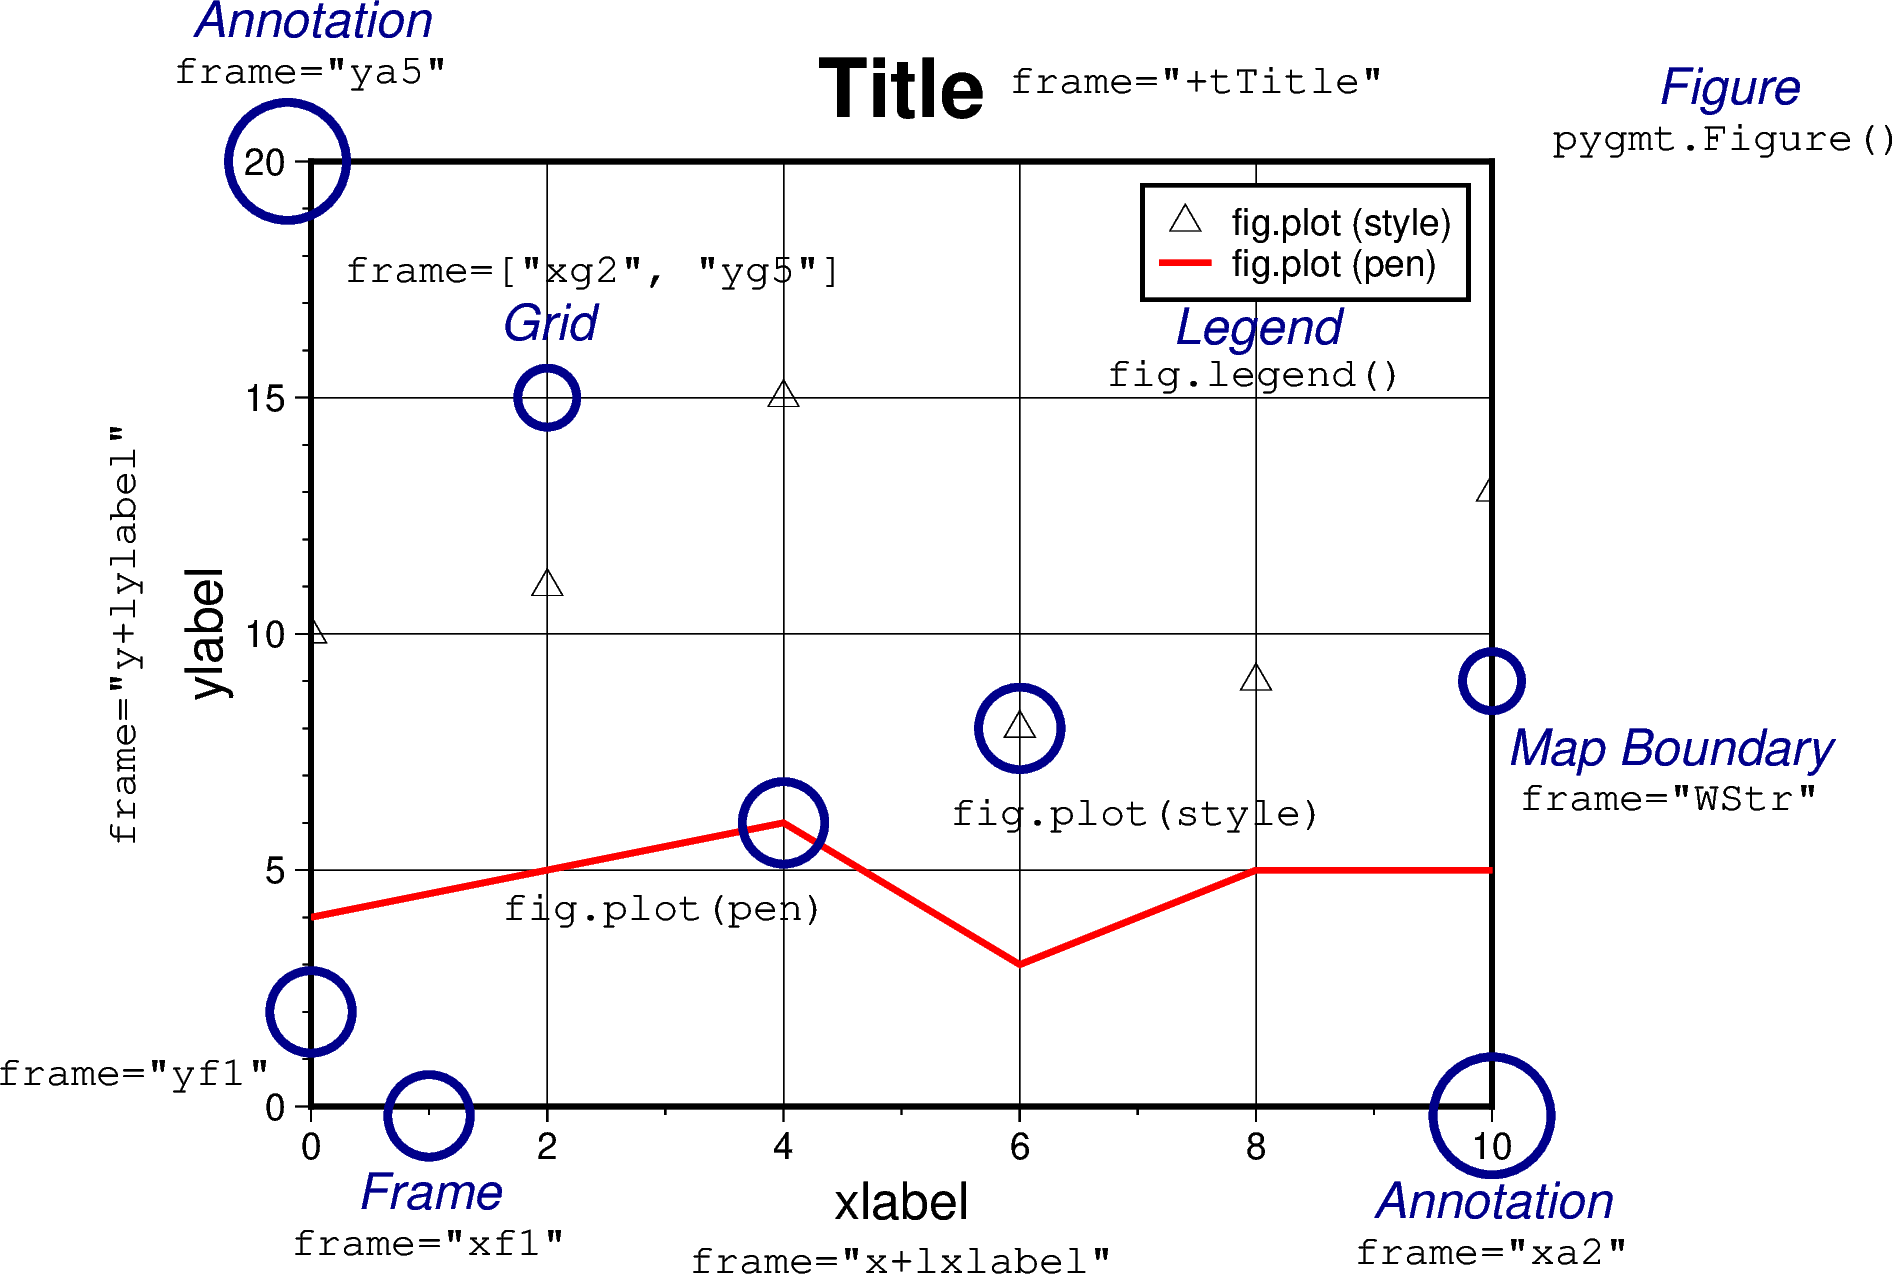

In [3]:
import pygmt

fig = pygmt.Figure()

x = range(0, 11, 2)
y_1 = [10, 11, 15, 8, 9, 13]
y_2 = [4, 5, 6, 3, 5, 5]

fig.basemap(
    region=[0, 10, 0, 20],
    projection="X10c/8c",
    frame=["WStr+tTitle", "xa2f1g2+lxlabel", "ya5f1g5+lylabel"],
)
fig.plot(x=x, y=y_1, style="t0.3c", label="fig.plot (style)")
fig.plot(x=x, y=y_2, pen="1.5p,red", label="fig.plot (pen)")

mainexplain = {"font": "12p,2,darkblue", "justify": "TC", "no_clip": True}
minorexplain = {"font": "10p,8", "justify": "TC", "no_clip": True}
# ============ Figure
fig.text(x=12, y=22, text="Figure", **mainexplain)
fig.text(x=12, y=20.8, text="pygmt.Figure()", **minorexplain)
# ============ Title
fig.text(x=7.5, y=22, text='frame="+tTitle"', **minorexplain)
# ============ xlabel
fig.text(x=5, y=-3, text='frame="x+lxlabel"', **minorexplain)
# ============ ylabel
fig.text(x=-1.7, y=10, text='frame="y+lylabel"', angle=90, **minorexplain)
# ============ x-majorticks
fig.plot(x=10, y=-0.2, style="c1c", pen="2p,darkblue", no_clip=True)
fig.text(x=10, y=-1.6, text="Annotation", **mainexplain)
fig.text(x=10, y=-2.8, text='frame="xa2"', **minorexplain)
# ============ y-majorticks
fig.plot(x=-0.2, y=20, style="c1c", pen="2p,darkblue", no_clip=True)
fig.text(x=0, y=23.4, text="Annotation", **mainexplain)
fig.text(x=0, y=22.2, text='frame="ya5"', **minorexplain)
# ============ x-minorticks
fig.plot(x=1, y=-0.2, style="c0.7c", pen="2p,darkblue", no_clip=True)
fig.text(x=1, y=-1.4, text="Frame", **mainexplain)
fig.text(x=1, y=-2.6, text='frame="xf1"', **minorexplain)
# ============ y-minorticks
fig.plot(x=0, y=2, style="c0.7c", pen="2p,darkblue", no_clip=True)
fig.text(x=-1.5, y=1, text='frame="yf1"', **minorexplain)
# ============ Grid
fig.plot(x=2, y=15, style="c0.5c", pen="2p,darkblue")
fig.text(x=2, y=17, text="Grid", **mainexplain)
fig.text(x=2.4, y=18, text='frame=["xg2", "yg5"]', **minorexplain)
# ============ Map Boundaries
fig.plot(x=10, y=9, style="c0.5c", pen="2p,darkblue", no_clip=True)
fig.text(x=11.5, y=8, text="Map Boundary", **mainexplain)
fig.text(x=11.5, y=6.8, text='frame="WStr"', **minorexplain)
# ============ fig.plot (style)
fig.plot(x=6, y=8, style="c0.7c", pen="2p,darkblue")
fig.text(x=7, y=6.5, text="fig.plot(style)", **minorexplain)
# ============ fig.plot (pen)
fig.plot(x=4, y=6, style="c0.7c", pen="2p,darkblue")
fig.text(x=3, y=4.5, text="fig.plot(pen)", **minorexplain)
# ============ Legend
fig.legend()
fig.text(x=8, y=16.9, text="Legend", **mainexplain)
fig.text(x=8, y=15.8, text="fig.legend()", **minorexplain)

fig.show()

gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.6 at 10x10 arc minutes reduced by Gaussian Cartesian filtering (52.4 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [3.0M]: earth_relief_10m_g.grd


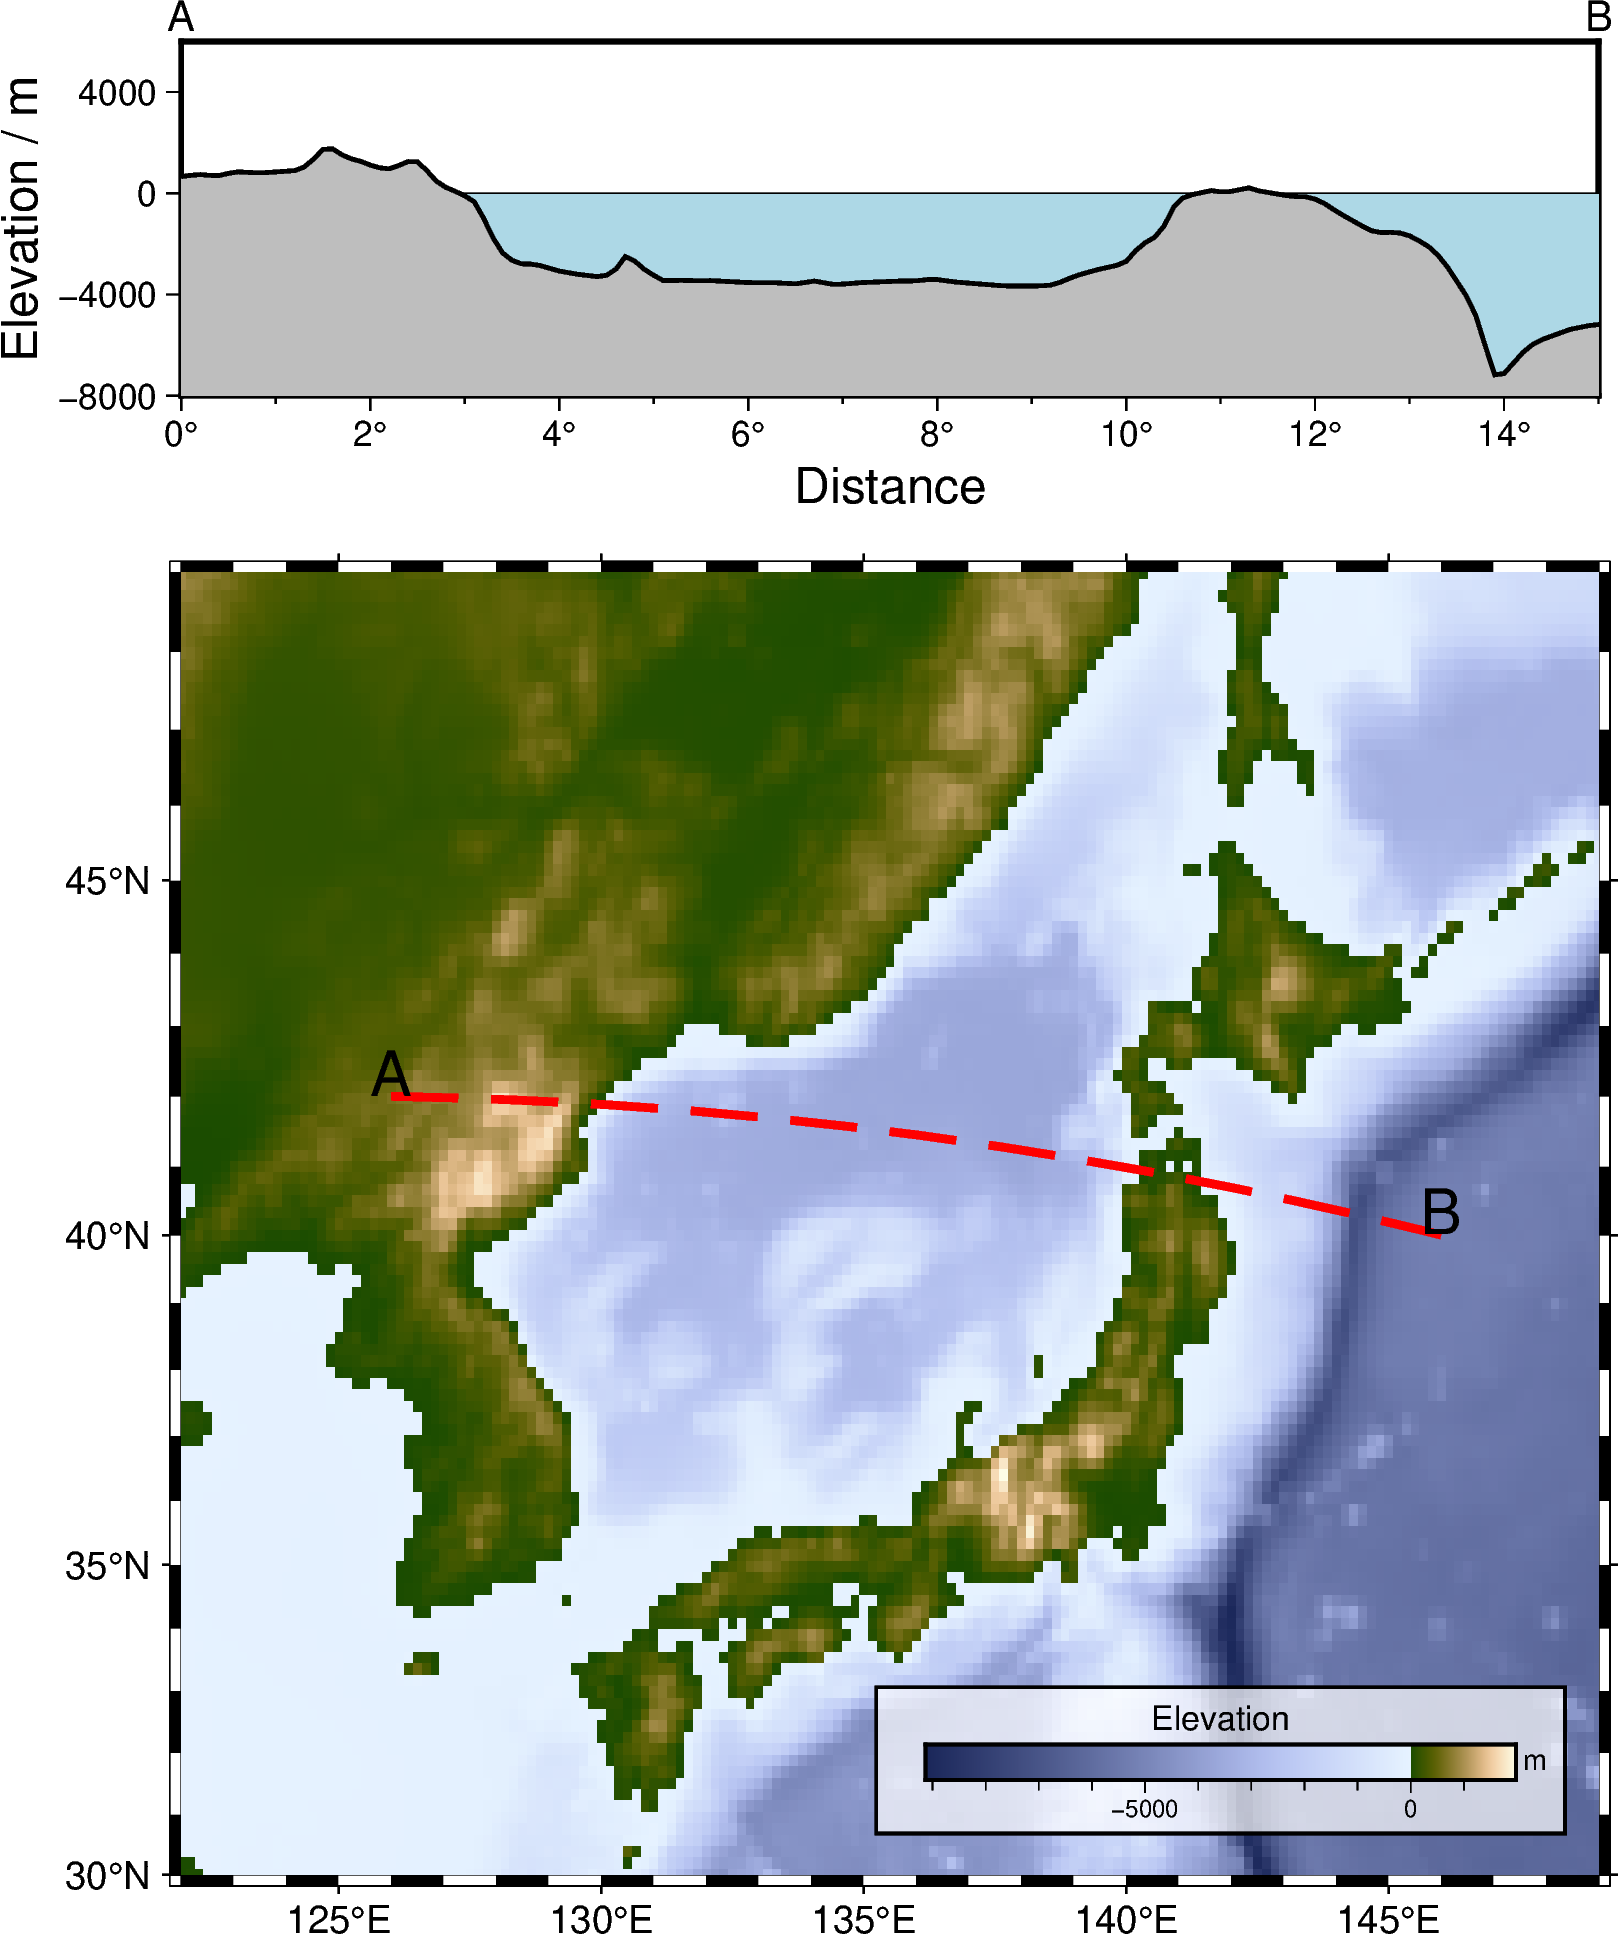

In [4]:
import pygmt

# Define region of study area
# lon_min, lon_max, lat_min, lat_max in degrees East and North
region_map = [122, 149, 30, 49]

# Create a new pygmt.Figure instance
fig = pygmt.Figure()

# ----------------------------------------------------------------------------
# Bottom: Map of elevation in study area

# Set up basic map using a Mercator projection with a width of 12 centimeters
fig.basemap(region=region_map, projection="M12c", frame="af")

# Download grid for Earth relief with a resolution of 10 arc-minutes and gridline
# registration [Default]
grid_map = pygmt.datasets.load_earth_relief(resolution="10m", region=region_map)

# Plot the downloaded grid with color-coding based on the elevation
fig.grdimage(grid=grid_map, cmap="oleron")

# Add a colorbar for the elevation
fig.colorbar(
    # Place the colorbar inside the plot (lower-case "j") in the Bottom Right (BR)
    # corner with an offset ("+o") of 0.7 centimeters and 0.3 centimeters in x or y
    # directions, respectively; move the x label above the horizontal colorbar ("+ml")
    position="jBR+o0.7c/0.8c+h+w5c/0.3c+ml",
    # Add a box around the colobar with a fill ("+g") in "white" color and a
    # transparency ("@") of 30 % and with a 0.8-points thick, black, outline ("+p")
    box="+gwhite@30+p0.8p,black",
    # Add x and y labels ("+l")
    frame=["x+lElevation", "y+lm"],
)

# Choose a survey line
fig.plot(
    x=[126, 146],  # Longitude in degrees East
    y=[42, 40],  # Latitude in degrees North
    # Draw a 2-points thick, red, dashed line for the survey line
    pen="2p,red,dashed",
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[126, 146],
    y=[42, 40],
    text=["A", "B"],
    offset="0c/0.2c",  # Move text 0.2 centimeters up (y direction)
    font="15p",  # Use a font size of 15 points
)

# ----------------------------------------------------------------------------
# Top: Elevation along survey line

# Shift plot origin to the top by the height of the map ("+h") plus 1.5 centimeters
fig.shift_origin(yshift="h+1.5c")

fig.basemap(
    region=[0, 15, -8000, 6000],  # x_min, x_max, y_min, y_max
    # Cartesian projection with a width of 12 centimeters and a height of 3 centimeters
    projection="X12c/3c",
    # Add annotations ("a") and ticks ("f") as well as labels ("+l") at the west or
    # left and south or bottom sides ("WSrt")
    frame=["WSrt", "xa2f1+lDistance+u°", "ya4000+lElevation / m"],
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[0, 15],
    y=[7000, 7000],
    text=["A", "B"],
    no_clip=True,  # Do not clip text that fall outside the plot bounds
    font="10p",  # Use a font size of 10 points
)

# Generate points along a great circle corresponding to the survey line and store them
# in a pandas.DataFrame
track_df = pygmt.project(
    center=[126, 42],  # Start point of survey line (longitude, latitude)
    endpoint=[146, 40],  # End point of survey line (longitude, latitude)
    generate=0.1,  # Output data in steps of 0.1 degrees
)

# Extract the elevation at the generated points from the downloaded grid and add it as
# new column "elevation" to the pandas.DataFrame
track_df = pygmt.grdtrack(grid=grid_map, points=track_df, newcolname="elevation")

# Plot water masses
fig.plot(
    x=[0, 15],
    y=[0, 0],
    fill="lightblue",  # Fill the polygon in "lightblue"
    # Draw a 0.25-points thick, black, solid outline
    pen="0.25p,black,solid",
    close="+y-8000",  # Force closed polygon
)

# Plot elevation along the survey line
fig.plot(
    x=track_df.p,
    y=track_df.elevation,
    fill="gray",  # Fill the polygon in "gray"
    # Draw a 1-point thick, black, solid outline
    pen="1p,black,solid",
    close="+y-8000",  # Force closed polygon
)

fig.show()